In [1]:
#importar librerias 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#importar data set
data=pd.read_excel('SA.xlsx') 
#quitar neutros 
data = data[data.sentiment != 'Neutro']
data = data[['text','sentiment','grupo']]

In [3]:
##Limpieza de texto
import re 
def clean_text (df, text_field): 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'https://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', ' ', elem ))   
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'publici(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'publicidad', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'@wom(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'wom', elem ))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'wom(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'wom', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'@entel(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+' , 'entel', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'@movistar(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'movistar', elem))
    df [text_field] = df [text_field].str.lower() 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:á)', 'a', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:é)', 'e', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:í)', 'i', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:ó)', 'o', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:ú)', 'u', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:ll)', 'yxy', elem))#guardar las ll 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:rr)', 'yxr', elem))#guardar las rr 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(.)\1+', r'\1', elem))#saca letras repetidas
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:yxy)', 'll', elem))#devuelve  la ll
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:yxr)', 'rr', elem))#devuelve  la rr
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:bkn)', 'buena', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:rt )', ' ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?: q )', ' que ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?: k )', ' que ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:guena)', ' buena ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:wena)', ' buena ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:\\n)', ' ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'jajaja(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'jajaja', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'ajaja(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', 'jajaja', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😂,🤣,😅])', ' jajaja ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😁,😎,😊,😘,🙈,🤭,😋,😄,😆])', ' bien ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😡,😠,😒,🤬])', ' enojo ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[😭,😢,😪,😞,😔,😫,😌,😩])', ' pena ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[🍄,🤦,🤦,🤦🏼,🤦,😤,😕,💩,😖,🤮,🐌,🖕,😑,💔,👎🏻])', 'pesimo ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[❤️,💓,💕,💜,😍])', ' encanta ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:[👏])', ' bravo ', elem))
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'(?:@[\w_]+)', ' ', elem)) #quita las menciones 
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'[^\w\ \s]','', elem)) #quita los emoticones (Deja solo letras y espacios)
    df [text_field] = df [text_field].apply(lambda elem: re.sub(r'\b(\w+)( \1\b)+', r'\1', elem))#elimina repetidos
    return df 
data=clean_text(data,'text')
data=clean_text(data,'text')
#quitar neutros 
dataset = data[data.sentiment != 'Neutro']

In [4]:
import nltk #toolkit
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("spanish")
#quitar stop word y realizar steming
corpus=[]
for i in range(0,1098):
    text=dataset['text'][i]
    text=text.split()
    text=[stemmer.stem(word) for word in text if not word in set(stopwords.words('spanish'))]
    text=' '.join(text)
    corpus.append(text)

In [5]:
#crear la bolsa de palabras
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,1].values

In [6]:
X.shape #dimensión de la matriz

(1098, 2288)

In [7]:
# Aplicar Kernel ACP
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = "rbf")
X = kpca.fit_transform(X)

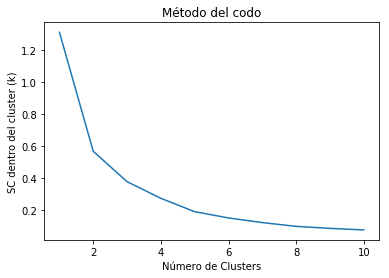

In [8]:
#KMEANS
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title("Método del codo")
plt.xlabel("Número de Clusters")
plt.ylabel("SC dentro del cluster (k)")
plt.show()

In [9]:
# Aplicar el método de k-means para segmentar el dataset
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

No handles with labels found to put in legend.


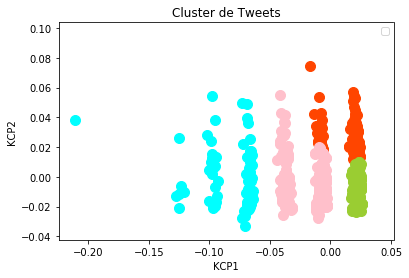

In [10]:
# Visualización de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "orangered")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "cyan")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "yellowgreen")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "pink")
plt.title("Cluster de Tweets")
plt.xlabel("KCP1")
plt.ylabel("KCP2")
plt.legend()
plt.show()

In [11]:
kmeans=pd.DataFrame({'cluster':y_kmeans})
train = dataset.join(kmeans)

Primer Cluster


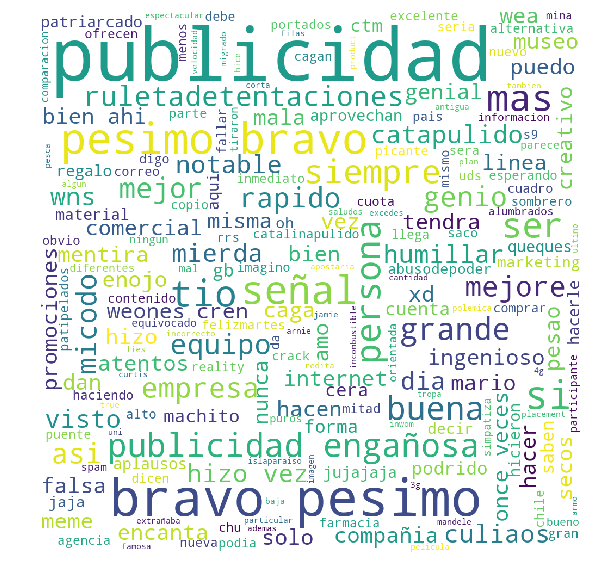

Segundo Cluster


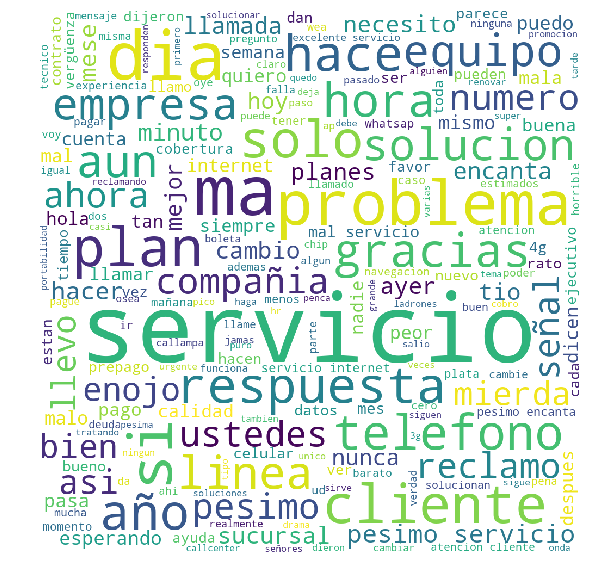

Tercero Cluster


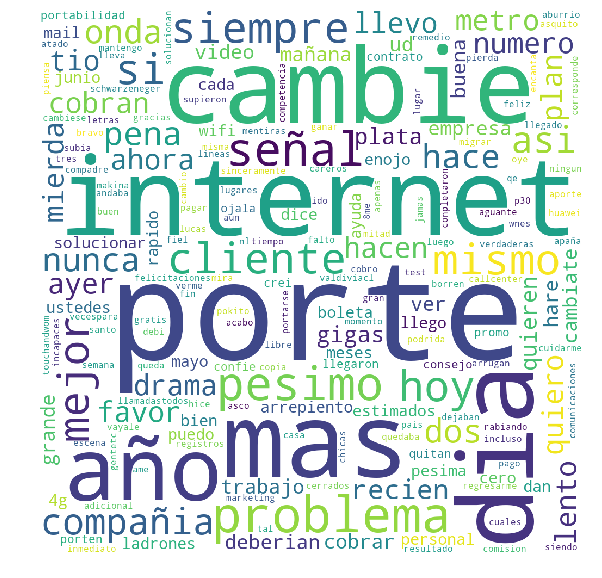

cuarto Cluster


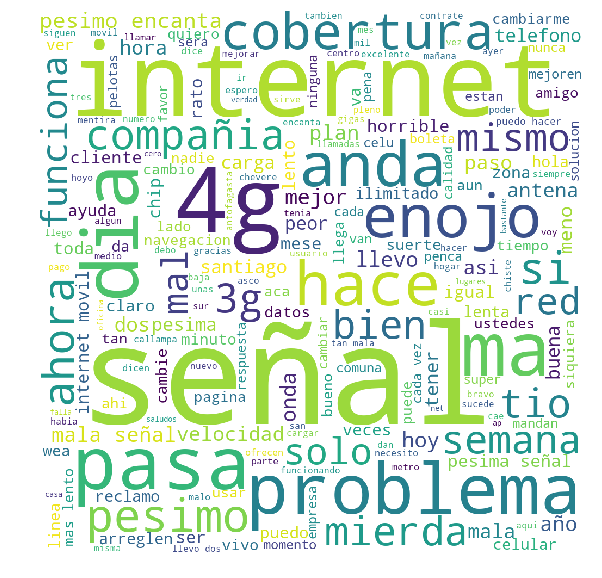

In [12]:
# Nube de palabras para determinar etiquetas del cluster
train_0 = train[train['cluster'] == 0]
train_0 = train_0['text']
train_1 = train[train['cluster'] == 1]
train_1 = train_1['text']
train_2 = train[train['cluster'] == 2]
train_2 = train_2['text']
train_3 = train[train['cluster'] == 3]
train_3 = train_3['text']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('wom')
                                and not word.startswith('jajaja')
                                and not word.startswith('movistar')
                                and not word.startswith('entel')])
    wordcloud = WordCloud(stopwords=stopwords.words('spanish'),
                      background_color=color,
                      width=1000,
                      height=1000
                     ).generate(cleaned_word)
    plt.figure(4,figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Primer Cluster")
wordcloud_draw(train_0,'white')
print("Segundo Cluster")
wordcloud_draw(train_1,'white')
print("Tercero Cluster")
wordcloud_draw(train_2,'white')
print("cuarto Cluster")
wordcloud_draw(train_3,'white')

In [14]:
# Aplicar el método de k-means para segmentar el dataset
kmeans = KMeans(n_clusters = 4, init="k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

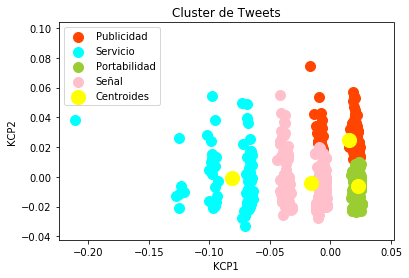

In [15]:
# Visualización de los clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = "orangered", label = "Publicidad")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = "cyan", label = "Servicio")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = "yellowgreen", label = "Portabilidad")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = "pink", label = "Señal")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = "yellow", label = "Centroides")
plt.title("Cluster de Tweets")
plt.xlabel("KCP1")
plt.ylabel("KCP2")
plt.legend()
plt.show()

In [16]:
#Exportar datos a Excel
train.to_excel("cluster.xlsx")